# **Import Libraries and modules**

In [0]:
# https://keras.io/
#!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)
Label :  9


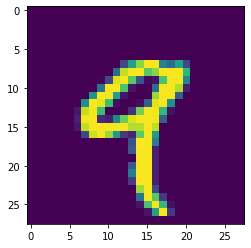

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])
print('Label : ',y_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, activation='relu', input_shape=(28,28,1)))  #26*26*32
model.add(Convolution2D(64, 3, activation='relu'))  #24
model.add(Convolution2D(128, 3, activation='relu'))  #22
model.add(MaxPooling2D(pool_size=(2,2)))  #11
model.add(Convolution2D(128, 3, activation='relu'))  #9
model.add(MaxPooling2D(pool_size=(2,2)))  #4
model.add(Convolution2D(128, 3, activation='relu'))  #2
model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 128)        

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 41s 679us/step - loss: 0.1108 - acc: 0.9657
Epoch 2/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.0394 - acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 32s 533us/step - loss: 0.0295 - acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 32s 532us/step - loss: 0.0218 - acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.0177 - acc: 0.9946
Epoch 6/10
60000/60000 [==============================] - 32s 532us/step - loss: 0.0148 - acc: 0.9951
Epoch 7/10
60000/60000 [==============================] - 32s 530us/step - loss: 0.0112 - acc: 0.9965
Epoch 8/10
60000/60000 [==============================] - 32s 533us/step - loss: 0.0101 - acc: 0.9967
Epoch 9/10
60000/60000 [==============================] - 32s 528us/step - loss: 0.0099 - acc: 0.9973
Epoch 10/10
60000/60000 [==============================] - 32s 530us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.032115076583823066, 0.9926]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[9.02711599e-16 1.16669662e-12 3.63297031e-11 3.46646267e-09
  5.30076141e-15 1.76281285e-13 1.41669486e-17 1.00000000e+00
  2.49329914e-11 2.06414261e-10]
 [1.42480634e-12 1.26007361e-16 1.00000000e+00 2.81828614e-15
  1.72407235e-15 1.96093072e-24 3.09429918e-13 1.24669857e-19
  8.71980602e-13 1.72238610e-19]
 [7.19385298e-08 9.99846101e-01 4.81378891e-07 3.67352282e-09
  5.47362220e-07 2.31535455e-06 9.26251360e-08 3.18549719e-05
  1.15684794e-04 2.83543068e-06]
 [1.00000000e+00 5.87143842e-15 2.50417985e-11 7.21990610e-13
  4.59978260e-14 3.28311532e-12 8.59452232e-11 4.45251746e-14
  4.69471684e-12 3.02790692e-12]
 [1.12547172e-13 3.04080459e-12 2.64665677e-13 1.91375884e-16
  9.99991417e-01 5.20575215e-11 2.70456156e-13 1.40257172e-11
  2.13942752e-09 8.57577015e-06]
 [5.21600363e-09 9.99945521e-01 6.22789997e-08 5.52553489e-11
  4.24373093e-06 2.14357030e-08 2.19277485e-09 2.00142858e-05
  2.98714640e-05 1.73429527e-07]
 [1.20588714e-17 2.91866642e-09 1.33109843e-10 2.21505108e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

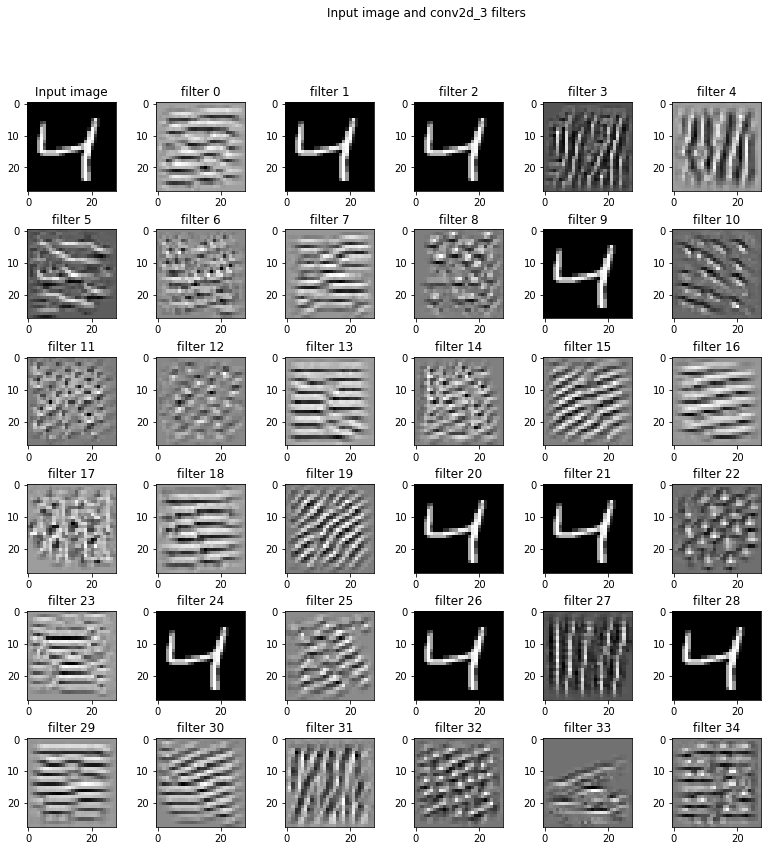

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [0]:
X_test=X_test.reshape(X_test.shape[0], 28, 28)

In [0]:
y_pred_val=y_pred.argmax(1)

In [55]:
print(y_pred_val)
print(y_test)
eval=y_test != y_pred_val
print(eval)
y_pred_fail=y_pred_val[eval]
y_test_fail=y_test[eval]
X_test_fail=X_test[eval]

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[False False False ... False False False]


In [56]:
print(y_pred_fail.shape)
print(y_test_fail.shape)
print(X_test_fail.shape)

(74,)
(74,)
(74, 28, 28)


Test Label :  1 Pred Label :  1


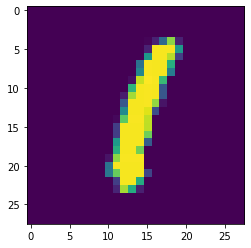

In [82]:
#Correctly Predicted cases
i=4564
plt.imshow(X_test[i])
print('Test Label : ',y_test[i],'Pred Label : ',y_pred_val[i])

'Test Label : 4       Pred Label : 9'

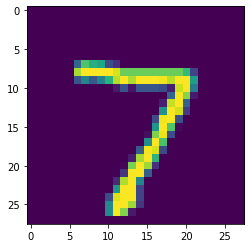

'Test Label : 8       Pred Label : 2'

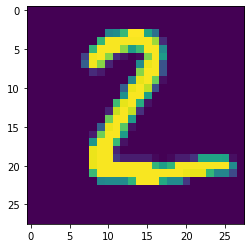

'Test Label : 6       Pred Label : 4'

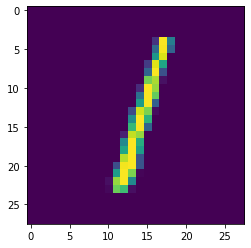

'Test Label : 3       Pred Label : 5'

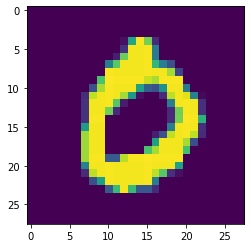

'Test Label : 8       Pred Label : 9'

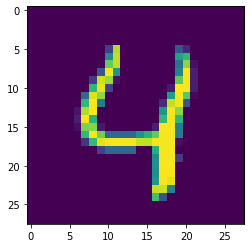

'Test Label : 6       Pred Label : 5'

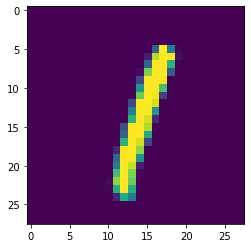

'Test Label : 6       Pred Label : 5'

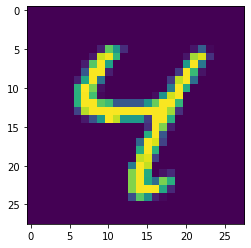

'Test Label : 4       Pred Label : 9'

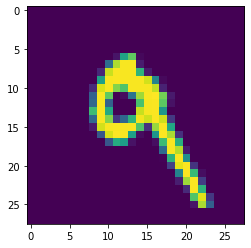

'Test Label : 7       Pred Label : 1'

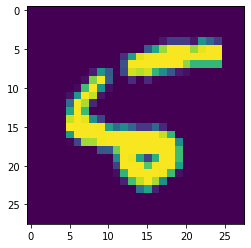

'Test Label : 5       Pred Label : 3'

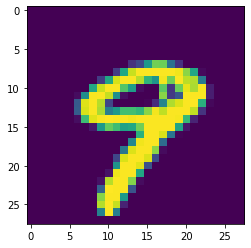

In [102]:
from IPython.display import display

#Incorrectly Predicted cases
for i in range(10):
  display('Test Label : '+ str(y_test_fail[i])+'       Pred Label : '+str(y_pred_fail[i]))
  fig, ax = plt.subplots(figsize=(4,4))
  ax=plt.imshow(X_test[i])
  display(fig)
  plt.close()